---
# Clustering dominant colours with KMedoids
---
---

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import pickle
import glob
from PIL import Image
from skimage import io
from skimage.color import rgb2lab, lab2rgb, xyz2lab, xyz2rgb, rgb2xyz, lab2xyz, deltaE_ciede94, deltaE_ciede2000
import time

In [2]:
imgs = Image.open('Bilder\\TEST.jpg') 
imgs.thumbnail((20, 20))
imgs.save('Bilder\\TESTi.jpg')

In [3]:
image = cv2.imread('Bilder\\TESTi.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
image = image.reshape((image.shape[0] * image.shape[1], 3))
lab=rgb2lab(image)
images=[lab]
image_names=['Bilder\\TESTi.jpg']

In [43]:
def plot_image(image):
    plt.figure()
    plt.axis("off")
    plt.imshow(image)

In [4]:
k=0

In [5]:
begin = time.time()
dislab=pd.DataFrame()#columns=range(99))
for i in range(0,len(images[k])-1):
    l = [0] * (i+1)
    lo=pd.DataFrame()
    for j in range(i+1,len(images[k])):
        data=deltaE_ciede2000(images[k][i],images[k][j])
        l.append(data)
            #print(l)
    lo=lo.append(l).T
        #lo.append(l)
        #print(lo)
    dislab=dislab.append(lo).reset_index(drop=True)
time.sleep(1)
end = time.time()

In [6]:
dislabT=dislab.T.reset_index(drop=True)
distance_df=dislab.reset_index(drop=True).add(dislabT, fill_value=0).fillna(0)
pickle.dump(distance_df, open("deltaE"+image_names[k], "wb"))
distance_df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.000000,0.907234,1.864079,1.660936,2.002312,2.372079,2.930946,3.768548,4.310330,5.172224,...,67.782279,66.071514,32.615551,10.131738,12.678184,40.856083,63.429722,64.005529,54.966015,69.387795
1,0.907234,0.000000,1.182593,1.376182,1.558974,1.803441,2.537442,3.290679,3.934857,4.749142,...,68.326030,66.623099,33.287846,9.917712,13.144342,41.484784,63.950835,64.519097,55.528317,69.864007
2,1.864079,1.182593,0.000000,0.800455,1.425895,1.850312,2.830622,2.671349,3.946630,4.457740,...,68.380252,66.668207,33.281128,9.224811,12.899015,41.428440,63.905377,64.469380,55.467681,69.817927
3,1.660936,1.376182,0.800455,0.000000,1.436227,2.107529,3.016117,2.691086,4.064758,4.540263,...,67.823637,66.098094,32.567083,9.237358,12.323382,40.721967,63.313884,63.882030,54.821067,69.273821
4,2.002312,1.558974,1.425895,1.436227,0.000000,0.784418,1.628944,1.809906,2.656970,3.301595,...,68.356716,66.638339,33.383346,10.481035,13.565215,41.396349,63.803547,64.353458,55.343738,69.713387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,40.856083,41.484784,41.428440,40.721967,41.396349,42.050535,42.335849,41.572552,42.544712,42.471251,...,20.015305,18.968356,10.102405,40.176573,31.661653,0.000000,17.073061,17.521901,12.090336,20.309123
396,63.429722,63.950835,63.905377,63.313884,63.803547,64.330921,64.521711,63.878576,64.609841,64.509759,...,7.977219,7.058926,27.043000,63.101912,56.144952,17.073061,0.000000,0.953547,5.408167,3.331745
397,64.005529,64.519097,64.469380,63.882030,64.353458,64.873795,65.056264,64.408540,65.124344,65.013634,...,8.705857,7.833677,27.536865,63.755506,56.867411,17.521901,0.953547,0.000000,5.650285,2.900601
398,54.966015,55.528317,55.467681,54.821067,55.343738,55.918064,56.123778,55.401338,56.200101,56.075641,...,11.469931,10.334210,22.340019,54.696886,47.107591,12.090336,5.408167,5.650285,0.000000,8.542238


In [8]:
from sklearn_extra.cluster import KMedoids

data = images[0]
dist = distance_df # Returns NxN array where N is the amount of data points

kmedoids = KMedoids(n_clusters=5,metric='precomputed').fit(dist)
labels = kmedoids.predict(dist)
cc=kmedoids.cluster_centers_

In [9]:
distance_df.insert(0, 'Cluster Labels', labels)

In [10]:
def cluster(n):
    cluster=distance_df.loc[distance_df['Cluster Labels'] == n][distance_df.index[distance_df['Cluster Labels'] == n].tolist()]
    return cluster

In [11]:
def find_centroid(n):
    clstr=cluster(n)
    summe=clstr.sum(axis=1)
    clstr['sum']=summe
    centroid_row=clstr.loc[clstr['sum']==min(summe)]
    centroid=centroid_row.index[0]
    return centroid

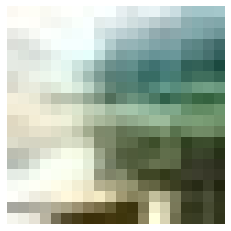

In [46]:
plot_image(cv2.cvtColor(cv2.imread('Bilder\\TESTi.jpg'), cv2.COLOR_BGR2RGB))

In [12]:
def get_value_centroid(k,n):
    return images[k][find_centroid(n)]

In [68]:
image[find_centroid(1)]

array([59, 62, 35], dtype=uint8)

In [13]:
def get_size_colour(n):
    return len(cluster(n))

In [14]:
def rgb_centroid(n):
    return lab2rgb(get_value_centroid(0,n))

In [69]:
# take the original rgb image
centroids=[image[find_centroid(n)] for n in range(0,5)]
centroids

[array([ 83, 124, 110], dtype=uint8),
 array([59, 62, 35], dtype=uint8),
 array([162, 171, 142], dtype=uint8),
 array([237, 243, 233], dtype=uint8),
 array([135, 170, 174], dtype=uint8)]

In [70]:
def centroid_histogram(labels):
    numLabels = np.arange(0, len(np.unique(labels)) + 1)
    (hist, _) = np.histogram(labels, bins = numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

In [71]:
def plot_colours(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    return bar
def plot_and_save_dominating_colours(labels, centroids):
    hist = centroid_histogram(labels)
    bar = plot_colours(hist, centroids)

    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    #plt.savefig(name,dpi=400,bbox_inches='tight')
    plt.show()

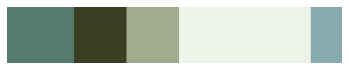

In [72]:
plot_and_save_dominating_colours(labels, centroids)

In [73]:
clt = KMeans(n_clusters = 5)
clt.fit(image)

KMeans(n_clusters=5)

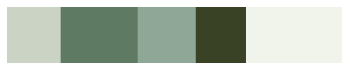

In [77]:
plot_and_save_dominating_colours(clt)